# Using Python for learning statistics Part 1

This Juppyter notebook contains the code examples form the blog post [Python coding skills for statistics Part 1](https://docs.google.com/document/d/16WJnYeezBevUBvsYpbklW04ukvrtG_8QVdfsbd15pqg/edit).

I've intentionally left empty code cells throughout the notebook,
which you can use to try some Python commands on your own.
For example,
you can copy-paste some of the commands in previous cells,
modify them and run to see what happens.
Try to break things.

**To run a code cell, press** the play button in the menu bar, or use the keyboard shortcut **SHIFT+ENTER**.

### Notebook setup

## What can python do for you?

### Python as a calculator

In [1]:
2.1 + 3.4

5.5

In [2]:
num1 = 2.1

In [3]:
num2 = 3.4

In [4]:
num1 + num2

5.5

Let's now compute the avarage of the numbers `num1` and `num2`.

In [5]:
(num1 + num2) / 2

2.75

### Powerful primitives and built-ins

In [6]:
grades = [80, 90, 70, 60]
avg = sum(grades) / len(grades)
avg

75.0

### For loops

In [7]:
total = 0
for grade in grades:
    total = total + grade
avg = total / len(grades)
avg

75.0

### Functions

Python functions are ...

To **define** the Python function,
we use the `def` keyword followed by the function name,
then we then specify the function input in parentheses,
and end with the symbol `:`,
which tells us "body" of the function is about to start.
The function body is a four-spaces-indented code block that specifies all the
calculations the function performs,
and ends with a `return` statement for the output of the function.

```
def <fname>(<input>):
    <fcalc 1>
    <fcalc 2>
    <fcalc ...>
    return <output>
```

#### Example

We want to define a Python function `mean` that computes the mean from a given sample (a list of values).

The mathematical definition of the mean is $\mathbf{Mean}(\mathbf{x}) = \frac{1}{n}  \sum_{i=1}^{i=n} x_i$,
where $\mathbf{x} = [x_1, x_2, x_3, \ldots, x_n]$ is a sample of size $n$ (a list of values).

The code for the function is as follows:

In [8]:
def mean(sample):
    total = sum(sample)
    avg = total / len(sample)
    return avg

To **call** the function `mean` with input `grades`, we use the Python code `mean(grades)`.

In [9]:
grades = [80, 90, 70, 60]
mean(grades)

75.0

#### Math function example (bonus topic)

In math, 
a function is a mapping from input values (usually denoted x) to output values (usually denoted y).
Consider the mapping that doubles the input and adds five to it,
which we can express as the math function $f(x) = 2x+5$.
For any input $x$,
the output of the function $f$ is denoted $f(x)$ and is equal to $2x+5$.
For example, $f(3)$ describes the output of the function when the input is $x=3$,
and it is equal to $2(3)+5 = 6 + 5 = 11$.
The Python equivalent of the math function $f(x) = 2x+5$ is shown below. 

In [10]:
def f(x):
    y = 2*x + 5
    return y

To **call** the function `f` with input `x`, we simply writhe `f(x)` in Python,
which is the same as the math notation we use for "evaluate the function at the value x."

In [11]:
f(3)

11

In [12]:
## Exercise: plot the graph of the function f(x)

## Why do you need coding for statistics?

### Data visualization

In [13]:
pricesW = [11.8, 10, 11, 8.6, 8.3, 9.4, 8, 6.8, 8.5]

<AxesSubplot: >

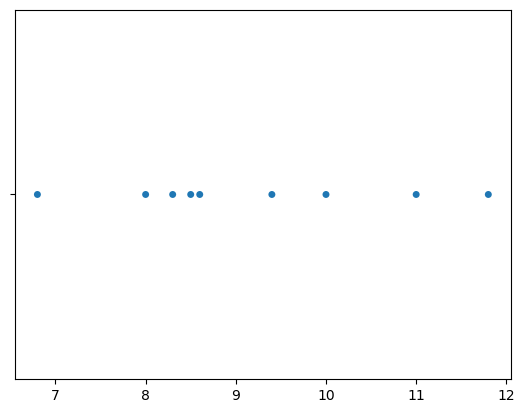

In [14]:
import seaborn as sns
sns.stripplot(x=pricesW, jitter=0)

<AxesSubplot: ylabel='Count'>

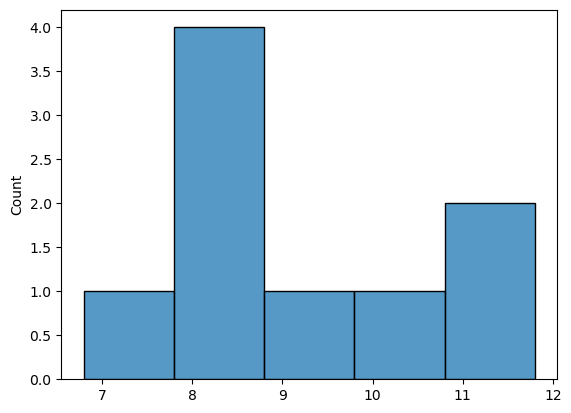

In [15]:
sns.histplot(x=pricesW)

<AxesSubplot: >

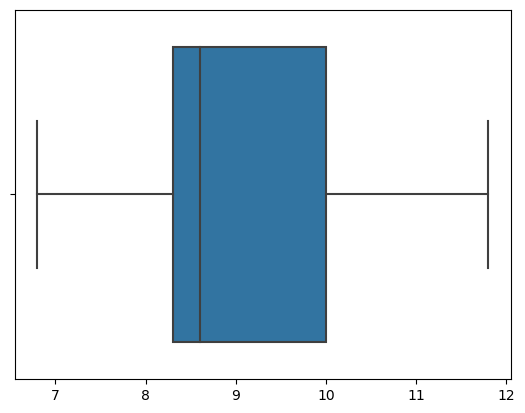

In [16]:
sns.boxplot(x=pricesW)

NameError: name 'savefig' is not defined

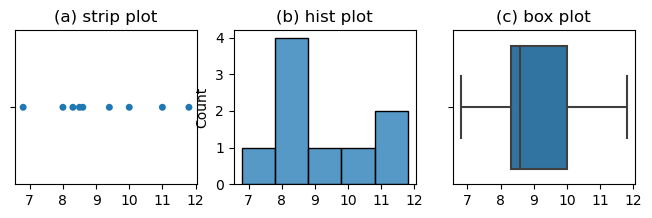

In [17]:
# FIGURES ONLY
import matplotlib.pyplot as plt
import seaborn as sns
with plt.rc_context({"figure.figsize":(8,2)}):
    fig, (ax1, ax2, ax3) = plt.subplots(1,3)

    ax1.set_title("(a) strip plot")
    sns.stripplot(x=pricesW, ax=ax1, jitter=0)
    ax1.set_xticks(range(7,13))

    ax2.set_title("(b) hist plot")
    sns.histplot(x=pricesW, ax=ax2)
    ax2.set_xticks(range(7,13))
    ax2.set_yticks(range(0,5))

    ax3.set_title("(c) box plot")
    sns.boxplot(x=pricesW, ax=ax3)
    ax3.set_xticks(range(7,13))

savefig(fig, "figures/epricesW_strip_hist_box_plots.png")

### Descriptive statistics

In [ ]:
len(pricesW)

In [ ]:
mean(pricesW)

#### Data manipulations using Pandas

In [ ]:
DATA_URL = "https://nobsstats.com/datasets/epriceswide.csv"

import pandas as pd
epriceswide = pd.read_csv(DATA_URL)
print(epriceswide)

In [ ]:
pricesW = epriceswide["West"]

In [ ]:
type(pricesW)

In [ ]:
# # ALT. we can input data by specifying lists of values
# pricesW = pd.Series([11.8,10,11,8.6,8.3,9.4,8,6.8,8.5])

#### Descriptive statistics using pandas

In [ ]:
pricesW.count()

In [ ]:
pricesW.mean()

In [ ]:
pricesW.describe()

### Understanding probability distributions

A random variable ...

described by



#### Building computer models for probability distributions

The standard normal distribution is denoted $Z \sim \mathcal{N}(\mu=0,\sigma=1)$,
where $Z$ is the name has the probability density function:

$$
    f_Z(z) = \tfrac{1}{\sqrt{2\pi}} e^{ - \frac{1}{2}z^2}.
$$

The standard normal is a special case of the general normal $\mathcal{N}(\mu, \sigma)$
where $\mu$ is the mean and $\sigma$ is the standard deviation.


To create a computer model for the random variable $Z$,
we can define the following Python function that performs the same calculation as the math function $f_Z$.

In [ ]:
import numpy as np

def fZ(z):
    const = 1 / np.sqrt(2*np.pi)
    exp = np.exp(-1/2 * z**2)
    return const*exp

Note the definition of the Python function `fZ` matches exactly the 
calculations described in the complicated-looking math definition of $f_Z$ we saw above.
This is one of the key benefits of learning Python:
you can convert any math expressions into code expressions
then do computations with it.

We can now compute the value $f_Z(1)$ by calling the function `fZ` with input `1`:

In [ ]:
fZ(1)

#### Predefined computer models

Instead of defining our own function to use for computations,
we can use one of the pre-defined probability model families in the SciPy library.

To create a computer model for the standard normal random variable $Z \sim \mathcal{N}(\mu=0, \sigma=1)$,
we need to "import" the `norm` model family form `scipy.stats` then call `norm(0,1)`
to initialize the model with parameters $\mu=0$ and $\sigma=1$.

In [ ]:
from scipy.stats import norm
rvZ = norm(0,1)
# rvZ

The probability density function $f_Z$ is available as the `.pdf` method on the model `rvZ`.

In [ ]:
rvZ.pdf(1)

#### Probability model visualizations

In [ ]:
zs = np.linspace(-4, 4)
fZs = rvZ.pdf(zs)
sns.lineplot(x=zs, y=fZs)

# FIGURES ONLY
ax = sns.lineplot(x=zs, y=fZs, color="b")
ax.set_xlabel("$z$")
ax.set_ylabel("$f_Z$")
savefig(ax.figure, "figures/pdf_of_rvZ.png")

The above graph tells you everything you need to know about the random variable $Z$.
The possible values of $Z$ are concentrated around the mean $\mu=0$.
The region of highest density is roughly between $z=-1$ and $z=1$,
with most of values between $z=-2$ and $z=2$,
then the probability densities drops off to form long tails.

The above graph shows the "shape" of the normal distribution $\mathcal{N}(\mu=0, \sigma=1)$,
which is just one representative of the general normal distribution.
Here some examples of graphs of the normal distribution for choices of the parameters $\mu$ and $\sigma$
to give you an idea of what they do.

![normal_panel.png](./attachments/normal_panel.png)

There are dozens of other probability distributions that can be useful for modelling 

You can take a look at the probability distirbution graphs here

TODO links to other panels of pdfs



### Doing probability calculations

Calculating probabilities with the continuous random variable $Z$ requires using *integration*,
which the process of computing the total are under a curve for some region.
For example, 
the probability that the random variable $Z$ will have a value somewhere
between $a$ and $b$ is defined as $\textrm{Pr}(\{a \leq Z \leq b\}) = \int_{z=a}^{z=b} f_Z(z) dz$.

In words ...

In [ ]:
from scipy.integrate import quad
quad(rvZ.pdf, 1, 2)[0]

In [ ]:
# FIGURES ONLY
zs = np.linspace(-4, 4, 1000)
fZs = rvZ.pdf(zs)
ax = sns.lineplot(x=zs, y=fZs)
mask = (1 < zs) & (zs < 2)
ax.fill_between(zs[mask], y1=fZs[mask], alpha=0.6, facecolor="red")
savefig(ax.figure, "figures/pdf_of_rvZ_highlight_1_to_2.png")

In statistics,
we often have to compute the probability in one or both tails of the distribution,
which corresponds the probability of observing "extreme values"

$\textrm{Pr}(\{Z \geq 2\}) = \int_{z=2}^{z=\infty} f_Z(z) dz$

In [ ]:
from scipy.integrate import quad
quad(rvZ.pdf, 2, np.inf)[0]

The cumulative distribution function (CDF) $F_Z$ is defined as the integral 
of the probability density function $f_Z$ up to some value $z=b$.

$$
    F_Z(b) = \textrm{Pr}(\{Z \leq b\}) = \int_{z=-\infty}^{z=b} f_Z(z)\; dz.
$$

The computer model `rvZ` provides the method `.cdf` which allows us to obtain the values of $F_Z$ directly.
For example, $F_Z(-2) = \textrm{Pr}(\{Z \leq -2\})$ can be computed as follows.

In [ ]:
rvZ.cdf(-2)

#### Discrete random variables (bonus topic)

There is a whole other type of random variables called "discrete" random variables,
which are defined only for integers, like $0$, $1$, $2$, etc.

For example, the Poisson random variable $H$ is defined by the probability mass function,

$$ 
  f_H(h) = \frac{\lambda^{h}e^{-\lambda }}{h!},
$$

for $h$ any natural number, $0, 1, 2, 3, \ldots$.
The parameter $\lambda$ (the Greek letter lambda) is used to control the shape of the distribution.
This math formula includes the lambda raised to the power $h$,
the exponential function $e^x$,
and the factorial function $n!$.
That's a lot of math!
If you need to do some probability calculations for the random variable $H$,
and you're ever forced to do the calculations using only pen and paper,
that would be quite the chore!

Wouldn't it be simpler (and more efficient) to define a Python function
that corresponds to the math function $f_H$,
then do all the calculations using Python as a calculator?

Let's see this in action!
We'll initialize a `poisson` model with the parameter $\lambda=20$.

In [ ]:
from scipy.stats import poisson

rvH = poisson(20)
# rvH

Having defined the computer model `rvH`, we can use it to:
- generate visualizations
- compute probabilities
- run simulations
- use `rvH` it as part of multi-step probability calculations
- anything else you might want to do with random variable $H$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
hs = np.arange(0,40)
fHs = rvH.pmf(hs)
plt.stem(fHs)

Calculating the probability of $H$ being between $10$ and $20$
is done by summing over all the probabilities for that range of values of $h$.

$$
    \textrm{Pr}(\{10 \leq H \leq 20\})
    = \sum_{h=10}^{h=20} f_H(h)
    = f_H(10) + f_H(11) + f_H(12) + \cdots + f_H(20).
$$

This calculation can be done using a Python summation:

In [ ]:
sum([rvH.pmf(h) for h in range(10,20+1)])

To see a complete worked example based on the 
see [Example 3: hard disk failures](https://minireference.com/static/excerpts/noBSstats/noBSstats_ch02_PROB.pdf#page=15) and
[Section 2.1.5 Hard disks example](https://minireference.com/static/excerpts/noBSstats/noBSstats_ch02_PROB.pdf#page=29) in the PDF preview of Chapter 2.

### Running statistical simulations

#### Sampling distributions

The *sampling distribution* of the mean for samples
of size $n=20$ from the standard normal distribution $Z \sim \mathcal{N}(0,1)$
is denoted $\overline{\mathbf{Z}} = \mathbf{Mean}(\mathbf{Z})$,
where $\mathbf{Z} = (Z_1, Z_2, \ldots, Z_{20})$ is a *random sample*.

The random variable $\overline{\mathbf{Z}}$ describes the kind of means we can expect to observe if
we compute the mean for a sample of size $n=20$ from the standard normal.

Let's generate $N=10$ samples $\mathbf{z}_1, \mathbf{z}_2, \mathbf{z}_3, \ldots, \mathbf{z}_{10}$ of size $n=20$
from $Z \sim \mathcal{N}(0,1)$, and compute the mean in each sample.

![samples_from_rvZ_n20_w_means_n_stds.png](./attachments/samples_from_rvZ_n20_w_means_n_stds.png)

The diamond markers indicate the position of the sample means computed from each sample:
$[\overline{\mathbf{z}}_1, \overline{\mathbf{z}}_2, \overline{\mathbf{z}}_3, \ldots, \overline{\mathbf{z}}_{10}]$.

Now imagine we generate 9990 more samples to obtain a total of $N=10000$ samples from the population model:
$\mathbf{z}_1, \mathbf{z}_2, \mathbf{z}_3, \ldots, \mathbf{z}_{1000}$.
We can visualize the sampling distribution of the mean $\overline{\mathbf{Z}} = \texttt{mean}(\mathbf{Z})$
by plotting a histogram of the means computed from the $10000$ random samples,
`zbars` = $[\overline{\mathbf{z}}_1, \overline{\mathbf{z}}_2, \overline{\mathbf{z}}_3, \ldots, \overline{\mathbf{z}}_{1000}]$,
where $\overline{\mathbf{z}}_j$ denotes the sample mean computed from the data in the $j$th sample,
$\overline{\mathbf{z}}_j = \texttt{mean}(\mathbf{z}_j)$.

In [ ]:
zbars = []
for i in range(0, 10000):
    sample = rvZ.rvs(20)
    zbar = mean(sample)
    zbars.append(zbar)

# zbars[0:5]

In [ ]:
ax = sns.histplot(zbars)

savefig(plt.gcf(), "figures/hist_sampling_dist_mean_rvZ_n20.png")

The above figure shows the sampling distribution of the mean for samples of size $n=20$ from the standard normal.
The histogram shows the "density of diamond shapes,"
and provides a representation of the sampling distribution of the mean $\overline{\mathbf{Z}} = \Mean(\mathbf{Z})$.

#### Verifying p-values

In [ ]:
from scipy.stats import norm, ttest_1samp

muK = 1000
sigmaK = 10
rvK = norm(muK, sigmaK)

count = 0
for j in range(0, 10000):
    sample = rvK.rvs(20)
    res = ttest_1samp(sample, popmean=muK)
    if res.pvalue < 0.05:
        count = count + 1

count / 10000

#### Verifying confidence intervals

In [ ]:
import numpy as np
np.random.seed(10)

muK = 1000
sigmaK = 10
rvK = norm(muK, sigmaK)

count = 0
for j in range(0, 10000):
    sample = rvK.rvs(20)
    res = ttest_1samp(sample, popmean=1000)
    ci = res.confidence_interval(confidence_level=0.90)
    if ci.low <= muK <= ci.high:
        count = count + 1

count / 10000

### Resampling methods

Clever techniques that reuse data from observed sample to simulate the variability in the population.


#### Bootstrap estimation

Generate 5000 bootstrap samples (sampling with replacement) from the sample `pricesW`.
Use the bootstrap samples to approximate the sampling distribution of the mean.

In [ ]:
n = len(pricesW)
xbars_boot = []
for i in range(0, 5000):
    bsample = np.random.choice(pricesW, n, replace=True)
    xbar_boot = mean(bsample)
    xbars_boot.append(xbar_boot)

sns.histplot(xbars_boot)

savefig(plt.gcf(), "figures/bootstrap_dist_mean_epricesW.png")

#### Permutation test

In [ ]:
DATA_URL = "https://nobsstats.com/datasets/epriceswide.csv"
import pandas as pd
epriceswide = pd.read_csv(DATA_URL)
pricesW = epriceswide["West"]
pricesE = epriceswide["East"]

We'll compare the prices in the two parts of the city in terms
of the difference between the average price in each sample.

In [ ]:
def dmeans(xsample, ysample):
    dhat = mean(xsample) - mean(ysample)
    return dhat

# Calculate the observed difference between means
dprice = dmeans(pricesW, pricesE)
dprice

Obtain sampling distribution of the difference between means under the null hypothesis.

In [ ]:
np.random.seed(42)

pdhats = []
for i in range(0, 10000):
    allprices = np.concatenate((pricesW, pricesE))
    pallprices = np.random.permutation(allprices)
    psampleW = pallprices[0:len(pricesW)]
    psampleE = pallprices[len(pricesW):]
    pdhat = dmeans(psampleW, psampleE)
    pdhats.append(pdhat)

Compute the p-value of the observed difference between means `dprice` under the null hypothesis.

In [ ]:
tails = [d for d in pdhats if abs(d) > dprice]
pvalue = len(tails) / len(pdhats)
pvalue

In [ ]:
# plot the sampling distribution in blue
ax = sns.histplot(pdhats, bins=100)

# plot red line for the observed statistic
plt.axvline(dprice, color="red")

# plot the values that are equal or more extreme in red
sns.histplot(tails, ax=ax, bins=100, color="red")
_ = ax.set_ylabel("$f_{\widehat{D}_0}$")

savefig(plt.gcf(), "figures/pvalue_viz_permutation_test_eprices.png")

### Data cleaning

In [ ]:
import pandas as pd

DATA_URL = "https://nobsstats.com/datasets/epriceswide.csv"
epriceswide = pd.read_csv(DATA_URL)
print(epriceswide)

Click [here](https://pandastutor.com/vis.html#code=import%20pandas%20as%20pd%0Aimport%20io%0A%0Aepriceswide_csv%20%3D%20'''%0AEast,West%0A7.7,11.8%0A5.9,10.0%0A7.0,11.0%0A4.8,8.6%0A6.3,8.3%0A6.3,9.4%0A5.5,8.0%0A5.4,6.8%0A6.5,8.5%0A'''%0A%0Aepriceswide%20%3D%20pd.read_csv%28io.StringIO%28epriceswide_csv%29%29%0A%0Aepriceswide.melt%28var_name%3D%22end%22,%20value_name%3D%22price%22%29&d=2023-07-02&lang=py&v=v1) to see a visualization of the above melt operation.

In [ ]:
eprices = pd.melt(epriceswide, var_name="end", value_name='price')
print(eprices)

In [ ]:
pricesW = eprices[eprices["end"]=="West"]["price"]
pricesE = eprices[eprices["end"]=="East"]["price"]

pricesW.values, pricesE.values

### Statistics procedures as code

#### Generating sampling distributions

In [ ]:
def gen_sampling_dist(rv, estfunc, n, N=10000):
    """
    Simulate `N` samples of size `n` from the random variable `rv` to
    generate the sampling distribution of the estimator `estfunc`.
    """
    estimates = []
    for i in range(0, N):
        sample = rv.rvs(n)
        estimate = estfunc(sample)
        estimates.append(estimate)
    return estimates

zbars = gen_sampling_dist(rvZ, estfunc=mean, n=20)
sns.histplot(zbars)

#### Generating bootstrap approximations to sampling distributions

In [ ]:
def gen_boot_dist(sample, estfunc, B=5000):
    """
    Generate estimates from the sampling distribution of the estimator `estfunc`
    based on `B` bootstrap samples (sampling with replacement) from `sample`.
    """
    n = len(sample)
    bestimates = []
    for i in range(0, B):
        bsample = np.random.choice(sample, n, replace=True)
        bestimate = estfunc(bsample)
        bestimates.append(bestimate)
    return bestimates


zbars_boot = gen_boot_dist(pricesW, estfunc=mean)
sns.histplot(zbars_boot)

#### The permutation test for comparing two groups

In [ ]:
def permutation_test_dmeans(xsample, ysample, P=10000):
    """
    Compute the p-value of the observed difference between means
    `dmeans(xsample,ysample)` under the null hypothesis where
    the group membership is randomized.
    """
    # 1. Compute the observed difference between means
    obsdhat = dmeans(xsample, ysample)

    # 2. Get sampling dist. of `dmeans` under H0
    pdhats = []
    allprices = np.concatenate((pricesW, pricesE))
    for i in range(0, P):
        pallprices = np.random.permutation(allprices)
        psampleW = pallprices[0:len(pricesW)]
        psampleE = pallprices[len(pricesW):]
        pdhat = dmeans(psampleW, psampleE)
        pdhats.append(pdhat)

    # 3. Compute the p-value
    tails = [d for d in pdhats if abs(d) > obsdhat]
    pvalue = len(tails) / len(pdhats)
    return pvalue

np.random.seed(42)
permutation_test_dmeans(pricesW, pricesE)


See the file [stats_helpers.py](https://github.com/minireference/noBSstatsnotebooks/blob/main/notebooks/stats_helpers.py)
for more examples of Python functions that 
for definitions all the important statistical analysis procedures in STATS 101.

In the past, students first contact with statistics was presented as a bunch of procedures
without explanation, and students were supposed to memorize when to use which "recipe".
Statistics instructors always had to "skip the details" because it's super complicated to
explain all the details (probability models, sampling distributions, p-value calculations, etc.).

Now that we have Python on our side, we don't have to water-down the material,
but can instead show all the detailed calculations for statistical tests,
as easy-to-understand Python source code, which makes it much much easier to understand what is going on.
Currently,
the file [stats_helpers.py](https://github.com/minireference/noBSstatsnotebooks/blob/main/notebooks/stats_helpers.py)
is 400 lines of code.
With a little bit of Python knowledge,
you can read this file and understand all of statistics.

## How much Python do you need to know?

I remind you the key aspect is to learn how to use Python as a calculator.

I talked about the `for`-loops and function definitions only to make sure you can **read Python code**,
but you don't need to write any such code to learn statistics.
As long as you know how to call functions and run code cells in a notebook,
then you'll still benefit from all the educational power that Python has to offer.



## Conclusion

## Links

- Book website [noBSstats.com](https://nobsstats.com/intro.html): contains all the notebooks, demos, and visualizations from the book.
- [Detailed book outline](https://docs.google.com/document/d/1fwep23-95U-w1QMPU31nOvUnUXE2X3s_Dbk5JuLlKAY/edit): continuously updated list of the topics that are covered in each section.
- [Python tutorial](https://nobsstats.com/tutorials/python_tutorial.html)
- [Pandas tutorial](https://nobsstats.com/tutorials/pandas_tutorial.html)
- [Seaborn tutorial](https://nobsstats.com/tutorials/seaborn_tutorial.html)
- Previous blog posts:
  - [Outline of the stats curriculum research](https://minireference.com/blog/fixing-the-introductory-statistics-curriculum/)
  - [Book proposal](https://minireference.com/blog/no-bullshit-guide-to-statistics-progress-update/)
  - [Stats survey results](https://minireference.com/blog/what-stats-do-people-want-to-learn/)
- [There's Only One Test](https://www.youtube.com/watch?v=S41zQEshs5k) talk by Allen B. Downey
- [Statistics for Hackers](https://www.youtube.com/watch?v=Iq9DzN6mvYA) talk by Jake Vanderplas


_____

# CUT MATERIAL

#### Pandas equivalent

In [ ]:
import pandas as pd
gseries = pd.Series(grades)
gseries.mean()

$N \sim \mathcal{N}(\mu,\sigma)$ has the probability density function:

$$
    f_N(x) = \tfrac{1}{\sigma\sqrt{2\pi}} e^{ -\frac{1}{2} \left( \frac{x-\mu}{\sigma} \right)^2 },
$$

where $\mu$ is the mean and $\sigma$ is the standard deviation.
We use the notation $\mathcal{N}(\mu, \sigma)$ to describe the distribution as math,
and `norm(mu,sigma)` to describe as computer model.

In [ ]:
import numpy as np

def fN(x, mu=0, sigma=1):
    const = 1 / (sigma*np.sqrt(2*np.pi))
    exp = np.exp( -1/2 * ( (x-mu)/sigma )**2 )
    return const * exp

In [ ]:
fN(3, 2, 3)

In [ ]:
def mean(sample):
    total = 0
    for xi in sample:
        total = total + xi
    avg = total / len(sample)
    return avg

### Problem NN (numerical math considerations)

We'll use the Python library NumPy (module `numpy` imported as `np`) 
to help us with the fancy math operations.
To compute $e^x$ we can call `np.exp(x)`,
and to compute the factorial of `n` we can call `np.math.factorial(n)`.

In [ ]:
import numpy as np

def fH(h):
    lam = 20
    return lam**h * np.exp(-lam) / np.math.factorial(h)

# calculation is not stable for h > 14
import matplotlib.pyplot as plt
import numpy as np
hs = np.arange(0,40)
fHs = [fH(h) for h in hs]
plt.stem(fHs)

We can apply the log-trick to the formula for ...

In [ ]:
from scipy.special import gammaln

def fHalt(h):
    lam = 20
    return np.exp(h * np.log(lam) - lam - gammaln(h + 1))

fHalts = [fHalt(h) for h in hs]
plt.stem(fHalts)

The log-transform trick and `gammaln` function are really useful for dealing with large factorials and multiplications of small probabilities,
which occur a lot in statistical calculations.
The need for numerical stability is one thing you need to keep in mind when
you implement statistical algorithms in production.

The cumulative distribution function (CDF) $F_Z$ is defined as the integral 
of the probability density function $f_Z$ up to some value $z=b$.

$$
    \textrm{Pr}(\{Z \leq b\}) = F_Z(b) = \int_{z=-\infty}^{z=b} f_Z(z)\; dz.
$$

The computer model `rvZ` provides the method `.cdf` which allows us to obtain the values of $F_Z$ directly.

In [ ]:
rvZ.cdf(2)

In [ ]:
# FIGURES ONLY
zs = np.linspace(-4, 4, 1000)
fZs = rvZ.pdf(zs)
ax = sns.lineplot(x=zs, y=fZs)
mask = (zs < 2)
ax.fill_between(zs[mask], y1=fZs[mask], alpha=0.6, facecolor="red")
savefig(ax.figure, "figures/pdf_of_rvZ_highlight_-infty_to_2.png")

We're often interested in computing the complement,

$$
    \textrm{Pr}(\{Z \geq b\}) = 1- F_Z(b) = \int_{z=b}^{z=\infty} f_Z(z) \; dz.
$$

In [ ]:
1 - rvZ.cdf(2)

In [ ]:
# FIGURES ONLY
zs = np.linspace(-4, 4, 1000)
fZs = rvZ.pdf(zs)
ax = sns.lineplot(x=zs, y=fZs)
mask = (zs > 2)
ax.fill_between(zs[mask], y1=fZs[mask], alpha=0.6, facecolor="red")
savefig(ax.figure, "figures/pdf_of_rvZ_highlight_2_to_infty.png")